# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [35]:
!wget https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homeworks/lexDat/LexicalData_toclean.csv

--2021-02-24 04:03:33--  https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homeworks/lexDat/LexicalData_toclean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3155021 (3.0M) [text/plain]
Saving to: ‘LexicalData_toclean.csv.2’

LexicalData_toclean 100%[===================>]   3.01M  --.-KB/s    in 0.1s    

2021-02-24 04:03:34 (23.0 MB/s) - ‘LexicalData_toclean.csv.2’ saved [3155021/3155021]



In [36]:
# to allow R and python use at the same time
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [37]:
%%R
library(tidyverse)

In [38]:
%%R
data <- read.csv('LexicalData_toclean.csv')
head(data)

  Sub_ID Trial Type  D_RT      D_Word Outlier D_Zscore
1    157     1    1   710      browse   false   -0.437
2     67     1    1 1,094 refrigerant   false    0.825
3    120     1    1   587     gaining   false   -0.645
4     21     1    1   984   cheerless   false    0.025
5    236     1    1   577    pattered   false   -0.763
6    236     2    1   715    conjures   false   -0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [39]:
%%R

# remove commas
data$D_RT <- as.numeric(gsub(",","",data$D_RT))
# remove missing value rows
data <- filter(data, !is.na(D_RT) | D_RT != "{}")
# check if all values positive
data <- filter(data, D_RT>0)
nrow(data)

[1] 62607


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

> *Write your response here.*
> * First action: A comma in a numerical field is a syntactical anomaly.
> * Second action: Missing values is a coverage anomaly
> * Third action: Reaction time cannot be negative. Hence this is a semantic anomaly.

---
3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [40]:
#INSERT CODE HERE
%%R

print(data %>% select(D_RT) %>% summarise_all(funs(mean, sd)))
print(data %>% count)

      mean       sd
1 807.2667 377.4396
      n
1 62607


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [41]:
#INSERT CODE HERE
%%R

data <- data %>% mutate(new_index = Trial-1) 

4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

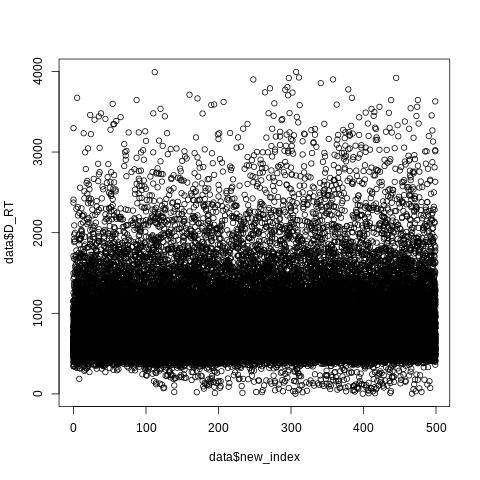

In [43]:
#INSERT CODE HERE
%%R
# colSums(!is.na(data))
plot(data$new_index, data$D_RT)

That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 25, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*